In [117]:
class BinaryTree:
    def __init__(self, val):
        self.value=val
        self.right=None
        self.left=None
        
    def get_value(self):
        return self.value
    
    def set_value(self,val):
        self.value=val
        
    def get_right(self):
        return self.right
    
    def get_left(self):
        return self.left
    
    def insert_left(self,v):
        t=BinaryTree(v)
        if self.left:
            t.left=self.left
        self.left=t
        return t
        
    def insert_right(self,v):
        t=BinaryTree(v)
        if self.right:
            t.right=self.right
        self.right=t
        return t

# ----------------------------------------


def build_tree():
    a=BinaryTree('*')
    b=a.insert_left('b')
    b.insert_right('d')

    b.insert_left('x')

    c=a.insert_right('c')
    c.insert_left('e')    
    c.insert_right('f')
    return a

t= build_tree()

import textwrap

def to_str(t,indent):
    if not t: return 'null'
    s= ("""
    {{   
        value: {:}, 
        left:  {:}, 
        right: {:}
    }}""".format(
        t.get_value(),
        to_str(t.get_left(),indent+4), 
        to_str(t.get_right(),indent+4)
    ))
    
    return textwrap.indent(s,' '* indent)
# print(to_str(t,0))


def print_edges(t):
    if not t: return
    
    left=t.get_left()
    if left:
        print(t.get_value(),'-',left.get_value())
        print_edges(left)
    
    right=t.get_right()
    if right:
        print(t.get_value(),'-',right.get_value())
        print_edges(right)


# print_edges(t)


from collections import OrderedDict
import json

def build_dict(t):
    
    if not t: return
    o=OrderedDict()

#     o=dict()

    o['v']=t.get_value()
    
    left=t.get_left()
    if left:
        o['left']=build_dict(left)
    
    right=t.get_right()
    if right:
        o['right']=build_dict(right)
    
    return o
d=build_dict(t)
json.dumps(d)
    

'{"v": "*", "left": {"v": "b", "left": {"v": "x"}, "right": {"v": "d"}}, "right": {"v": "c", "left": {"v": "e"}, "right": {"v": "f"}}}'

In [121]:
# VISUALIZATION ----------------------

import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt

def draw_graph(G):
    pos =graphviz_layout(G, prog='dot')
    nx.draw(G,pos, with_labels=True, width=2, node_size=1000, node_color="orange",alpha=1.0)
    lbls = nx.get_edge_attributes(G,'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = lbls)
#     nx.draw_networkx_nodes(G,pos,node_size=2000, nodelist=['x'])
#     nx.draw_networkx_edges(G, pos, alpha=0.9, width=6, edge_color="orange", edgelist=[(1, 'Petya')])
    plt.show()



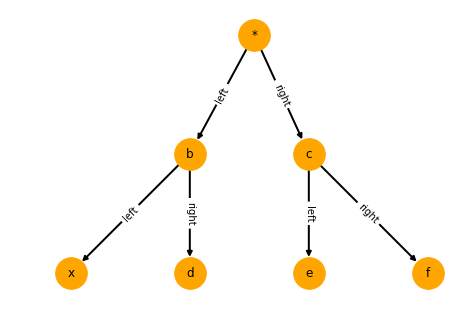

In [122]:


def build_graph(g,t):
    if not t: return

    left=t.get_left()
    if left:
        g.add_edge(t.get_value(),left.get_value(),label='left')
        build_graph(g,left)
    
    right=t.get_right()
    if right:
        g.add_edge(t.get_value(),right.get_value(),label='right')
        build_graph(g,right)


G=nx.DiGraph()
build_graph(G,t)
draw_graph(G)



Using the information from above we can define four rules as follows:

- If the current token is a '(', add a new node as the left child of the current node, and descend to the left child.
- If the current token is in the list ['+','-','/','*'], set the root value of the current node to the operator represented by the current token. Add a new node as the right child of the current node and descend to the right child.
- If the current token is a number, set the root value of the current node to the number and return to the parent.
- If the current token is a ')', go to the parent of the current node.


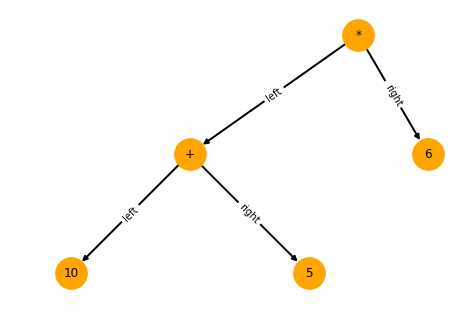

In [116]:
class BinaryTree:
    def __init__(self, val):
        self.value = val
        self.right = None
        self.left = None

    def get_value(self):
        return self.value

    def set_value(self, val):
        self.value = val

    def get_right(self):
        return self.right

    def get_left(self):
        return self.left

    def insert_left(self, v):
        t = BinaryTree(v)
        if self.left:
            t.left = self.left
        self.left = t
        return t

    def insert_right(self, v):
        t = BinaryTree(v)
        if self.right:
            t.right = self.right
        self.right = t
        return t


# from pythonds.basic.stack import Stack
# from pythonds.trees.binaryTree import BinaryTree

def buildParseTree(fpexp):
    fplist = fpexp.split()
    pStack = []  # Stack()
    eTree = BinaryTree('')
    pStack.append(eTree)  # push(eTree)
    currentTree = eTree

    for i in fplist:
        if i == '(':
            currentTree.insert_left('')  # insertLeft('')
            pStack.append(currentTree)  # push(currentTree)
            currentTree = currentTree.get_left()  # getLeftChild()

        elif i in ['+', '-', '*', '/']:
            currentTree.set_value(i)  # setRootVal(i)
            currentTree.insert_right('')  # insertRight('')
            pStack.append(currentTree)  # push(currentTree)
            currentTree = currentTree.get_right()  # getRightChild()

        elif i == ')':
            currentTree = pStack.pop()

        elif i not in ['+', '-', '*', '/', ')']:
            try:
                currentTree.set_value(int(i))  # setRootVal(int(i))
                parent = pStack.pop()
                currentTree = parent

            except ValueError:
                raise ValueError("token '{}' is not a valid integer".format(i))

    return eTree


pt = buildParseTree("( ( 10 + 5 ) * 6 )")
# print(pt)
g=draw_graph(pt)

